In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%load_ext autoreload
%autoreload 2
from implementations_tanguy import *

In [2]:
from helpers import *

# load data.
particle, products, ids = load_csv_data('data/train.csv', sub_sample= True)

In [3]:
# build sampled x and y.
seed = 1
y = np.expand_dims(particle, axis=1)
y, X = sample_data(y, products, seed, size_samples=1000)
x, mean_x, std_x = standardize(X)

tx = np.c_[np.ones((y.shape[0], 1)), x]

### Gradient Descent

In [4]:
print(y.shape, x.shape)
np.seterr(divide = 'ignore') 
initial_w = np.zeros((tx.shape[1], 1))

(1000, 1) (1000, 30)


We need to find a balance between the number of iteration and gamma (the step size), the shorter the number of iterations we do, the faster it runs but we stay far away from an optimum loss

In [5]:
start_time = time.time()
w_gd, loss_gd = mean_squared_error_gd(y, tx, initial_w, 10, 0.001)
print("loss:", np.sqrt(2*loss_gd[0][0]), "--- %s seconds ---" % (time.time() - start_time))

loss: 0.9887157191548617 --- 0.015650033950805664 seconds ---


If we increment too much the number of iterations then the code becomes really slow

In [6]:
start_time = time.time()
w_gd, loss_gd = mean_squared_error_gd(y, tx, initial_w, 1000000, 0.001)
print("loss:", np.sqrt(2*loss_gd[0][0]), "--- %s seconds ---" % (time.time() - start_time))

loss: 0.8127890774559601 --- 55.125667333602905 seconds ---


As we can see our loss has reduced significantly, however it took too long to compute

In [7]:
start_time = time.time()
w_gd, loss_gd = mean_squared_error_gd(y, tx, initial_w, 10000, 0.001)
print("loss:", np.sqrt(2*loss_gd[0][0]), "--- %s seconds ---" % (time.time() - start_time))

loss: 0.816464947351656 --- 0.5459892749786377 seconds ---


Here we can see a good balance, the loss has barely increased and the computing time is much lower.
The logic is similar respect to gamma, the shorter the step size is, the more iterations we would need to get to the optimal loss

In [8]:
start_time = time.time()
w_gd, loss_gd = mean_squared_error_gd(y, tx, initial_w, 10000, 0.0000001)
print("loss:", np.sqrt(2*loss_gd[0][0]), "--- %s seconds ---" % (time.time() - start_time))

loss: 0.9986612313087818 --- 0.5459940433502197 seconds ---


And the larger the gamma, we might miss the optimal loss and diverge

### Stochastic Gradient Descent

In [9]:

#np.seterr(divide = 'ignore') 

#initial_w = np.zeros((tx.shape[1], 1))

start_time = time.time()

w_sgd, loss_sgd = mean_squared_error_sgd(y, tx, initial_w, 1, 10000, 0.001)
print("loss:", np.sqrt(2*loss_sgd[0][0]), "--- %s seconds ---" % (time.time() - start_time))

#We make sure to calculate the loss during gradient computation

loss: [0.86552495] --- 0.3370668888092041 seconds ---


### EDA

In [10]:
import pandas as pd
X_panda = pd.DataFrame(X)

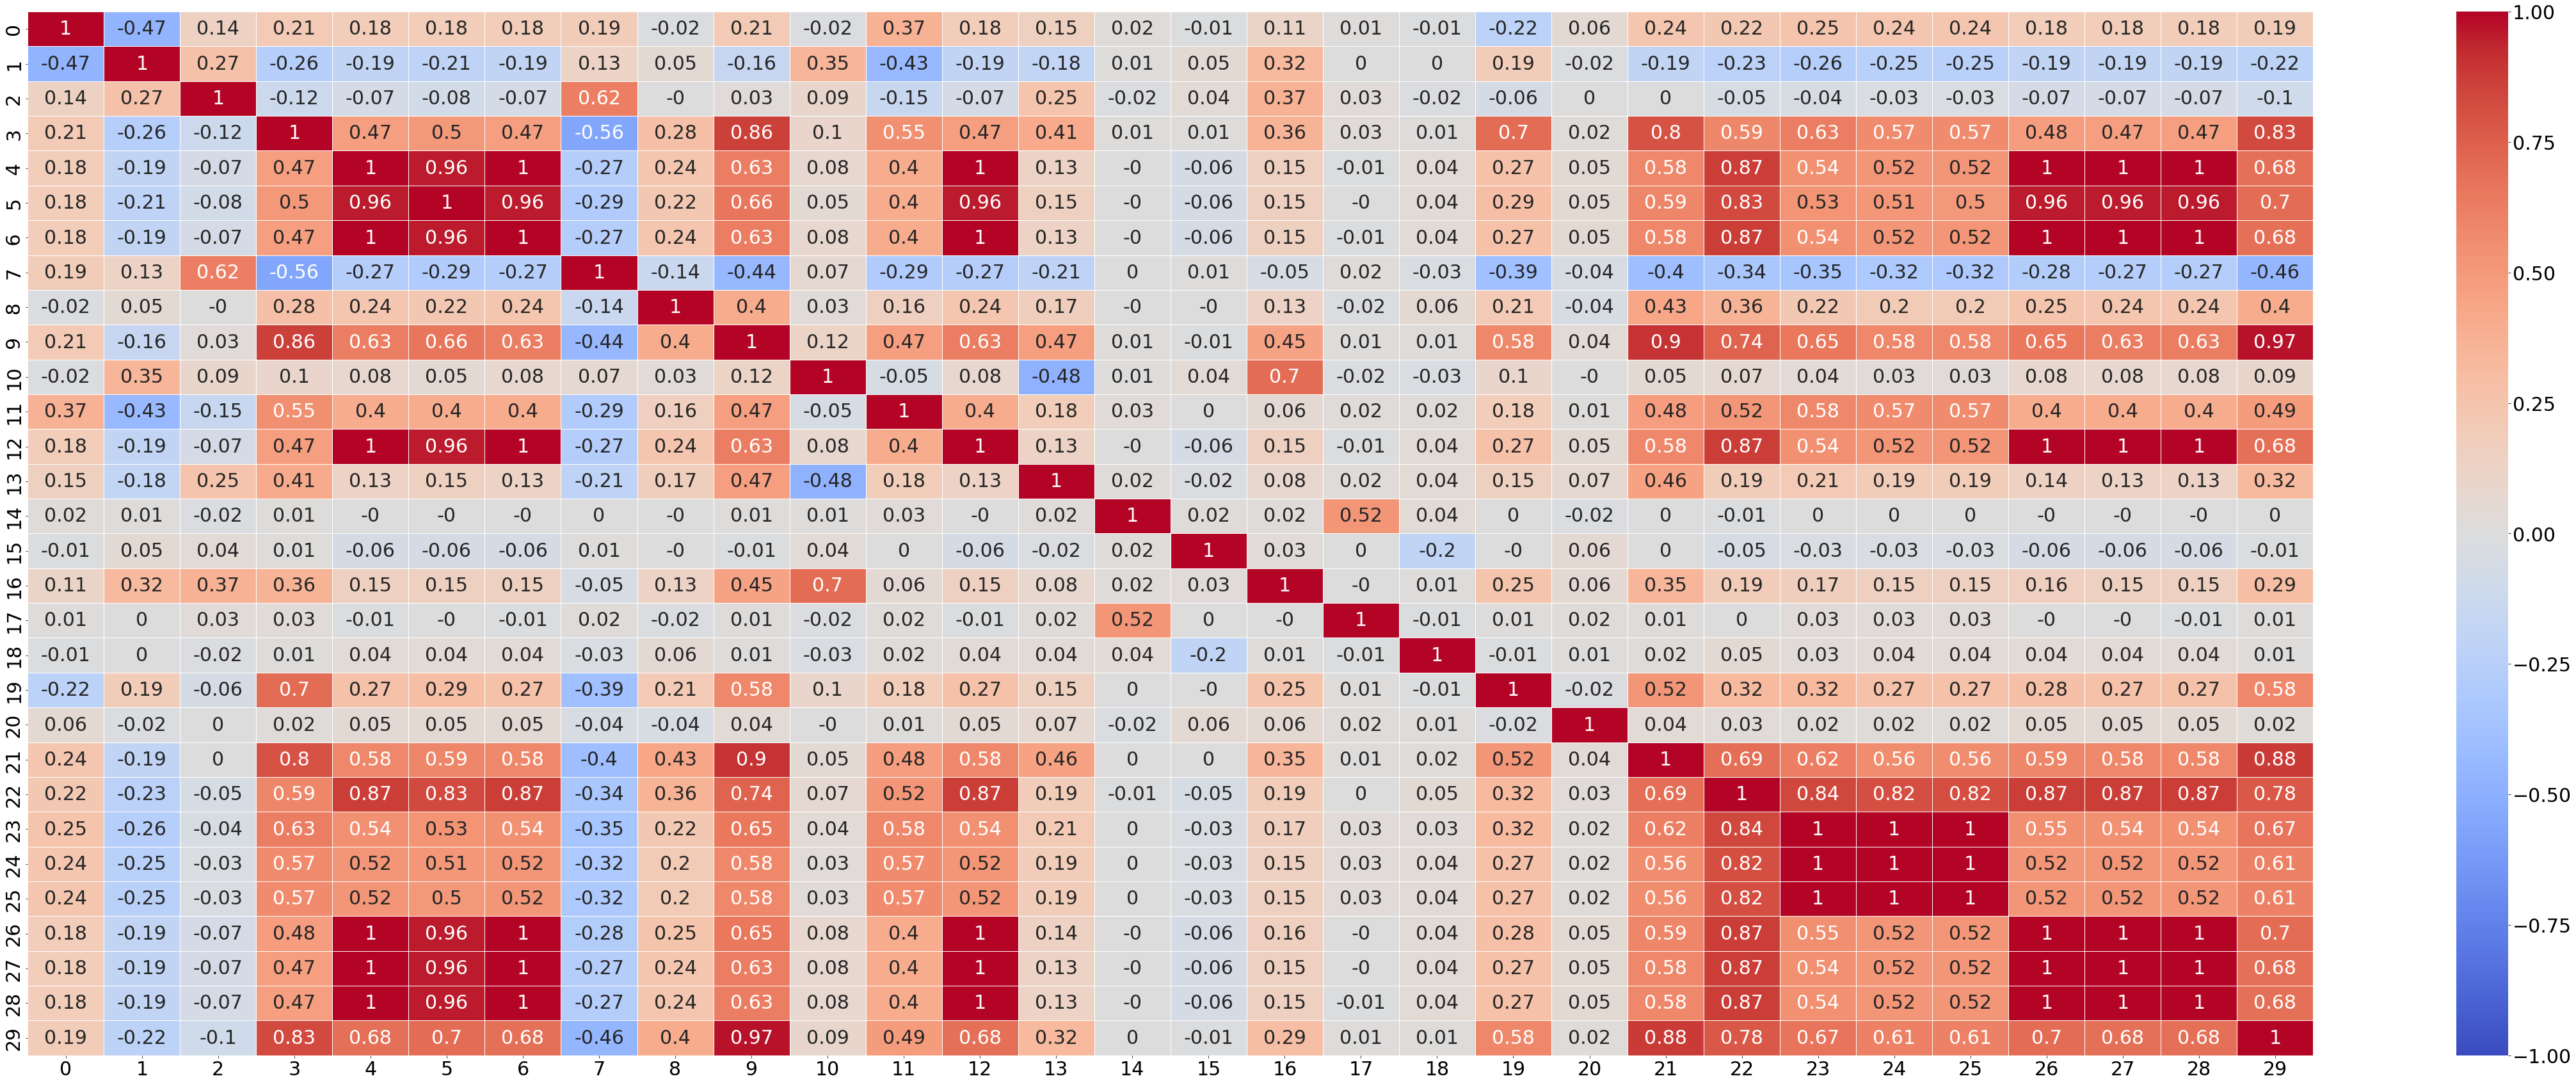

In [11]:
plt.figure(figsize=(80,30))
plt.rc('font',size=30)
sns.heatmap(data = X_panda.corr().round(2),vmin = -1, vmax = 1, cmap = 'coolwarm',linewidths = .5, annot=True, annot_kws = {"size":30})
plt.show()

# along the diagonal 1 --> my correlation between the same feature
# 4,5,6,12 --> seem to be correlated (correlation score between 0.95 and 1)
# from 21 to 29 --> more or less correlated
# from 3 to 12 and from 21 to 29 seem to be correlated

### LEAST SQUARES WITH NORMAL EQUATIONS

In [12]:
print(y.shape, x.shape)

w_ls , loss_ls = least_squares(y,tx)
print(np.sqrt(2*loss_ls[0][0]))

#print(w_ls)

(1000, 1) (1000, 30)
0.8093956252718545


### Logistic Regression

In [13]:
np.seterr(divide = 'ignore') 

initial_w = np.zeros((tx.shape[1], 1))


w_lr, loss_lr = logistic_regression(y,tx, initial_w, 10000, 0.0001)
print("loss", np.sqrt(2*loss_lr[0][0]))
#print(w_ls, "\n", w_lr)

#the loss becomes negative if we choose to big of a gamma and number of iterations
#it seems that at some point we go past the global minimum and start diverging 
#having a very small gamma solves this problem
#the minimal value I could find is 0.8540791315850801 (with rmse 100 samples)

loss 1.4064182891239316


### Linear Cross-validation (half-half)

In [20]:
from cross_validation import *



k_indices = build_k_indices(y, 2, 1)
loss_train, loss_test = cross_validation_linear_gd(y, x,  k_indices, 1)
print("train loss : ", loss_train, "test loss : ", loss_test)

#there s some overfit with linear regression

train loss :  [[0.98903568]] test loss :  [[0.98766718]]


### cross_validation of logistic regression 

In [21]:

loss_train, loss_test = cross_validation_logistic_regression(y, x,  k_indices, 1)
print("train loss : ", loss_train, "test loss : ", loss_test)

train loss :  [[0.98723359]] test loss :  [[0.98586587]]


### Find best lambda for ridge regression

 the choice of lambda which leads to the best test rmse is 0.01610 with a test rmse of 0.833


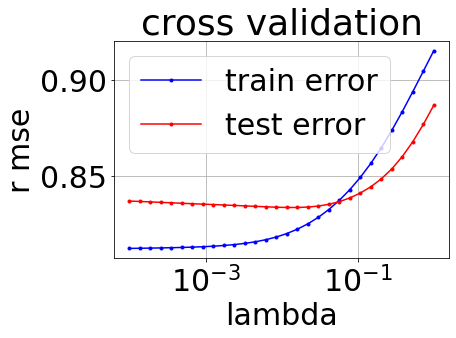

In [22]:
best_lambda, best_rmse = find_best_lambda_ridge_regression(x, y, 7, np.logspace(-4, 0, 30))

### Penalized logistic regression

In [23]:
np.seterr(divide = 'ignore') 

initial_w = np.zeros((tx.shape[1], 1))


w_lr, loss_lr = reg_logistic_regression(y,tx, 0.6, initial_w, 10000, 0.0001)
print("loss", np.sqrt(2*loss_lr[0][0]))
#print(w_ls, "\n", w_lr)



loss 1.2030083973942496


### Cross-validation of penalized logistic regression

In [26]:
loss_train, loss_test = cross_validation_reg_logistic_regression(y, x, k_indices, 1,0.001)
print("train loss : ", loss_train, "test loss : ", loss_test)

train loss :  [[0.91912647]] test loss :  [[0.90551362]]


### Find best lambda for regularized logistic regression

 the choice of lambda which leads to the best test rmse is 0.00010 with a test rmse of 0.916


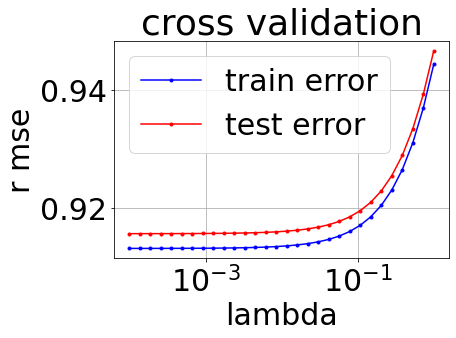

In [27]:
best_lambda, best_rmse = find_best_lambda_reg_logistic_regression(x, y, 7, np.logspace(-4, 0, 30))
